# Loan Application Study

## Table of Contents
- [Introduction](#intro)
- [Getting Aggregations from Previous Dataset](#prev)
- [Working with All Applications (Previous & Current)](#all)
    - [Data Wrangling](#wrangling)
    - [Exploratory Data Analysis](#eda)
    - [Conclusion of Analysis](#conclusions)
    - [Modeling](#modeling)



<a id='introduction'></a>
## Introduction
> **Business Overview:**
The business revolves around providing financial assistance to individuals or businesses in the form of loans. When someone applies for a loan, they are requesting a specific amount of money to be lent to them for a defined purpose. The lending institution evaluates the applicant's creditworthiness, risk profile, and financial stability to make informed decisions about granting or denying the loan.
>
> **Problem Statement:**
> The problem is to predict whether a loan will be approved or not based on the applicant's information.
> 
> **Data set:** You can find it [here](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter?select=application_data.csv) on Kaggle. Consists of two files: current application data and previous applications data.
>
> **Strategy of using both datasets:**
> I will use the previous dataset only to get aggregated information about the applicant's history.\
Then I will merge it with the current application data to get the final dataset for analysis.

> ### Questions for Analysis we need to answer.
> 
> * **Distribution of fiels.**
>
> * **Applicant's info**
>   1. How does the clients' Demographics such as the age related to the approval?
>   2. Is there a relation between income and the approval of loan?
>   3. How does the type of work or housing sitiuation related to the approval?
>
> * **Application's info**
>   1. Is there an optimal day of the week or time of day for applicants to submit their loan requests for higher approval chances?
>   2. Which most important documents that are necessary for the approval?

In [3]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

curr_df = pd.read_csv('./Dataset/application_data.csv')
prev_df = pd.read_csv('./Dataset/previous_application.csv')

curr_df.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prev_df.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


> Making the names of the columns in lower case for simplicity

In [6]:
curr_lower_case_columns_dict = {column: column.lower() for column in curr_df.columns}
prev_lower_case_columns_dict = {column: column.lower() for column in prev_df.columns}

curr_df.rename(columns=curr_lower_case_columns_dict, inplace=True)
prev_df.rename(columns=prev_lower_case_columns_dict, inplace=True)

curr_df.head(1)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Functions we will use

In [120]:
df_train

array([162154,  83850,      4], dtype=int64)

In [219]:
def get_previous_status(row, threshold=0.1):
    """
    Returns the previous status as 'Good' = 1 or 'Bad' = -1 based on the approval and rejection rates
    Inputs:
        row: A row of the dataframe
        threshold: The threshold that cause giving 'Good' sign hard a bit. [Minimising the risk]
    
    Returns:
        1: If the previous status was good
        -1: If the previous status was bad
        0: If the previous status was neutral
    """
    
    status = row.approval_rate - row.rejection_rate
    
    if status > threshold:
        return 1
    elif 0 < status < threshold:
        return 0
    else:
        return -1

def get_percentage_of_missing(dataframe, sort=True):
    """
        Getting the percentage of missing values in the dataframe
        Input:
            dataframe
        Output:
            percentage: like .value_counts() but with column name and the corresponding % of missing value.
    """
    columns_with_missing_values = dataframe.loc[:, dataframe.isna().sum() > 0]
    percentages = (columns_with_missing_values.isna().sum() / dataframe.shape[0]) * 100
    
    if sort == True:
        percentages = percentages.sort_values(ascending=False)
        
    return percentages


def get_occupation_type(row):
    """
        Getting the most appearing job based on the organization and the education type
        
        Inpust:
            row: a row with data of the applicant's application
        Output:
            job: The most appearing job in case of the provided organization & education
    """
    changed = False
    if not pd.isnull(row.occupation_type): # If not missing value
        job = row.occupation_type
        
    else:
        organization = row.organization_type
        education    = row.name_education_type
        compination  = (organization, education)
        
        if compination in grouped_data.index: # if the compination of the organization and the education exists
            job = grouped_data[(organization, education)].idxmax()
            
        else: # if not, take based only the organization
            job = grouped_data[organization].sort_values(ascending=False).reset_index().occupation_type[0]
            
    return job


    
    
    
################## Plotting Functions ####################33

color_plate_1 = ['#547053', '#789d83', '#b78d37', '#604422', '#274532', '#905626', '#304f4d', '#7d888e', '#c8c6a9']
color_plate_2 = ['#1d4c76', '#1d2746', '#7b96b2', '#6381aa', '#9d8aab', '#85bee6', '#31312a', '#58606f', '#bbb7bf']
def plot_categorical_pie(dataframe, column, labels=None, title=None):
    """
    SUMMERY: Function to plot pie chart for the categories on specific column.
    
    Inputs:
        dataframe: (pd.DataFrame) the DataFrame containing the data.
        column: (str) column name for which to chart the pie chart.
        title: (str) title of the pie chart.
        
    Output:
        Displaying the pie chart.
    """
    values = dataframe[column].value_counts().values
    
    if labels is None:
        labels = dataframe[column].value_counts().index.tolist()
        
    if title is None:
        title = f'Distribution of {column}'
    
    
    sns.set()
    colors = color_plate_2[:len(labels)]
    # fig = plt.figure(figsize =(5, 7))
    plt.pie(values, labels=labels, colors=colors, autopct='%.0f%%', textprops={'color': "w"})
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.title(title)
    plt.show()
    
def boxplot(dataframe, column_name):
    """
        Plotting the distribution of a column with boxplot
    """
    
    sns.boxplot(x=column_name, data=dataframe);

    # Calculate and plot the mean as a red point
    mean_value = dataframe[column_name].mean()
    plt.plot(mean_value, 0, marker='o', markersize=8, color='red', label='Mean');
    plt.title(f'Distribution of the {column_name}')
    plt.legend();
    
def get_propotions(column_name, DataFrame):
    """
        SUMMERY:
            TO GIVE PROPOTIONS OF THE VALUES IN THE COLUMNS.
        TAKE:
            column_name: (str) for the column we need to get propotions on it.
            DataFrame: (DataFrame) for the data frame we need to make propotions on it.
        RETURN:
            propotions
     """ 
    
    total_values_for_each_category = DataFrame.groupby([column_name])['target'].count()
    
    # Getting the count of all who are repaied for each category and count of all who didn't in each category.
    values_of_repaying = DataFrame.groupby([column_name, 'target'])['target'].count()
    
    # To be fair we do not use ValuesFor_Show_noShow but we divide it by the TotalValues
    # as our data have different numbers of rows for each category .. so to be fair we divide each 
    # count of patients who showed up in category X by the total number of patients in this category.
    propotions = values_of_repaying / total_values_for_each_category
    
    return propotions


def PlotPropotions(propotions, column_name, color1, color2, xLabel_1, xLabel_2):
    # Propotions come from get_propotion function.
    propotions.unstack().plot(kind='bar', color=[color1, color2]);
    plt.ylabel('Avg num of patients')
    plt.xlabel('');
    plt.title(f'{column_name} & No-show', fontsize=15, fontweight='bold')
    plt.legend(labels=['Showed up', 'Did not show up'], fontsize=14, bbox_to_anchor=(1.05, 0.7));
    plt.xticks([0, 1], [xLabel_1, xLabel_2], rotation=0);

<a id='previous-dataset'></a>

## Getting aggregations from previous dataset

In [8]:
prev_df.groupby(['sk_id_curr', 'sk_id_prev']).count()['name_contract_type'].head()

sk_id_curr  sk_id_prev
100001      1369693       1
100002      1038818       1
100003      1810518       1
            2396755       1
            2636178       1
Name: name_contract_type, dtype: int64

> There are many current applications that have previous applications.
> 
> For this reason we will aggregate the previous applications data to get the insights we need and then merge it with the current applications data.

In [9]:
# Dataframe we will save our aggregated data to
agg_df = pd.DataFrame()

> **For approved applications:**
> 1. The average amount of credit taken by the applicant.
> 2. The average amount of annuity approved for the applicant.

> **Note**: for approved only due to get intiuation about how much the applicant can pay back.

> Calculating the avg amout of credit taken by the applicant
> 
> **amt_application** -> is the amount of credit requested by the applicant.\
> **amt_credit** -> is the amount of credit granted to the applicant.
> 
> **Notice**: So, we will use amt_creadit for approved applications.

In [10]:
approved_df = prev_df.query('name_contract_status == "Approved"')

approved_df = approved_df.groupby('sk_id_curr').agg({
    'amt_credit': 'mean',
    'amt_annuity': 'mean',
    })

> **For only approved and refused applications as our target is to approve or refuse the loan:**

In [11]:
grouped_data_approval_refusion = prev_df.groupby(['sk_id_curr', 'name_contract_status']).count().unstack(fill_value=0)['sk_id_prev']

agg_df['approval_rate'] = grouped_data_approval_refusion['Approved'] / grouped_data_approval_refusion.sum(axis=1)
agg_df['rejection_rate'] = grouped_data_approval_refusion['Refused'] / grouped_data_approval_refusion.sum(axis=1)

agg_df['prev_status'] = agg_df.apply(lambda row: get_previous_status(row), axis=1)

In [12]:
# No need for the approval and rejection rates anymore
agg_df.drop(columns=['approval_rate', 'rejection_rate'], inplace=True)

# Merging the 2 aggregation datasets
agg_df = approved_df.merge(agg_df, on='sk_id_curr', how='inner')

In [13]:
# Renaming the columns
agg_df.rename(columns={'amt_credit': 'prev_avg_approved_credit', 'amt_annuity': 'prev_avg_approved_annuity'}, inplace=True)

In [14]:
agg_df.sample(5)

,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
sk_id_curr,,,
429579,22513.50,2803.7700,1
159532,65521.50,7303.0050,1
369137,101241.00,10203.0750,1
403829,69293.25,7509.6525,1
373678,79481.25,6443.6400,1


In [15]:
# The Nan values here will be error in data, so we will drop them
agg_df.isna().sum()

prev_avg_approved_credit     0
prev_avg_approved_annuity    2
prev_status                  0
dtype: int64

In [16]:
agg_df.dropna(inplace=True)
agg_df.isna().any()

prev_avg_approved_credit     False
prev_avg_approved_annuity    False
prev_status                  False
dtype: bool

> Now we finished getting features we need from the previous data, Now lets add these aggreagated values with the current dataset

In [17]:
df = curr_df.merge(agg_df, on='sk_id_curr', how='left')
df.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.0,56553.990,1.0


## Working with all the applications [prev & curr]

### Data Assessing

In [18]:
df.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,livingapartments_avg,livingarea_avg,nonlivingapartments_avg,nonlivingarea_avg,apartments_mode,basementarea_mode,years_beginexpluatation_mode,years_build_mode,commonarea_mode,elevators_mode,entrances_mode,floorsmax_mode,floorsmin_mode,landarea_mode,livingapartments_mode,livingarea_mode,nonlivingapartments_mode,nonlivingarea_mode,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.0,56553.990,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 125 entries, sk_id_curr to prev_status
dtypes: float64(68), int64(41), object(16)
memory usage: 295.6+ MB


> Checking for duplicated documets

In [20]:
print(f'Number of duplicated applications is: {int(df.duplicated().any())}')

Number of duplicated applications is: 0


> Checking how much new documents that not have history

In [21]:
print(f'There are {df.prev_status.isna().sum()} new applications that have no history')

There are 17448 new applications that have no history


> Missing data in columns

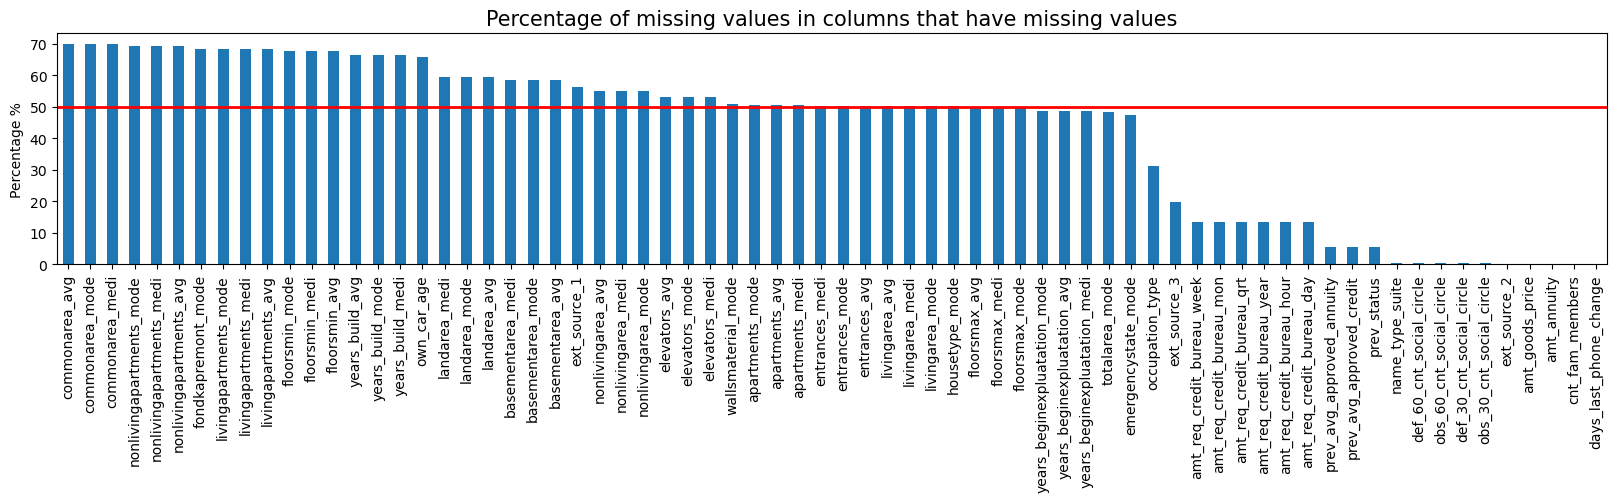

In [26]:
percentage_per_column = get_percentage_of_missing(df)

percentage_per_column.plot(kind='bar', figsize=(20, 3));
plt.axhline(50, c='r', linewidth=2);
plt.title('Percentage of missing values in columns that have missing values', fontsize=15);
plt.ylabel('Percentage %', fontsize=10);

> Columns with more than 50% missing values will be dropped.

> **Checking categorical columns.**
>
> **Note**: Threshould chosen to `8` after considering the columns for the `name_income_type` column

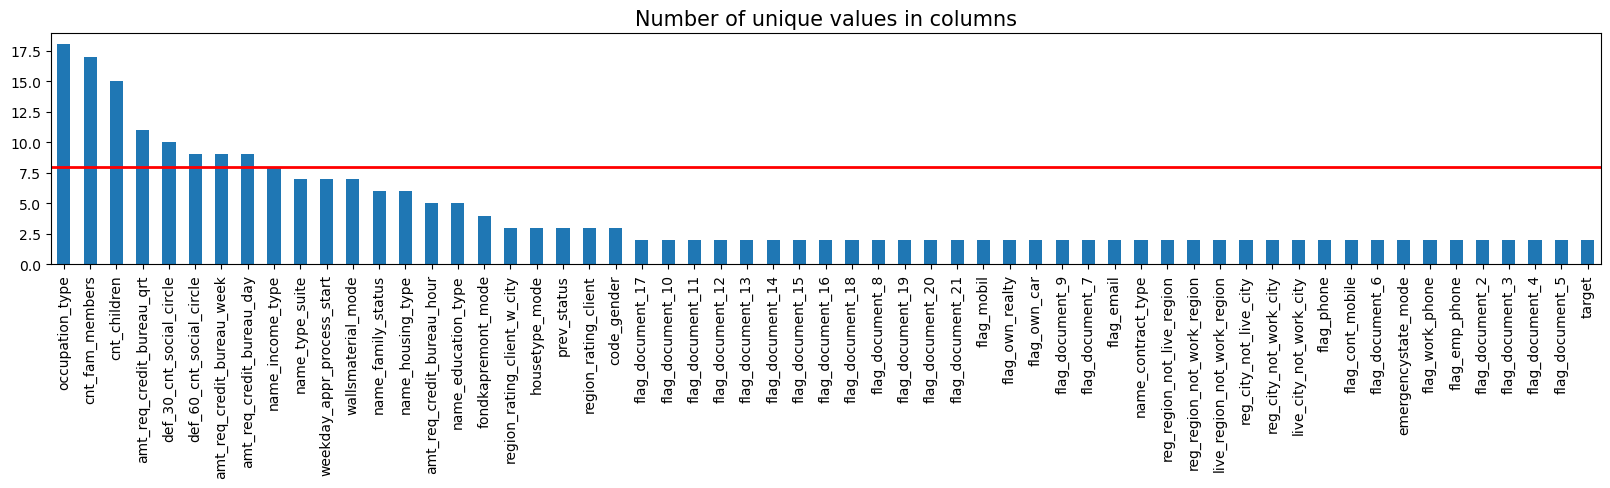

In [27]:
threshould = 8
suggested_categorical_columns = df.loc[:, (df.nunique() < 24)].nunique().sort_values(ascending=False)

suggested_categorical_columns.plot(kind='bar', figsize=(20, 3));
plt.axhline(threshould, c='r', linewidth=2);
plt.title('Number of unique values in columns', fontsize=15);

> * Most categorical columns are `Binary`.
> * Columns under the line considered categorical.
> * **Exception:** There are some columns under the threshould not categorical columns such as:\
`amt_req_credit_bureau_hour` as it is the number of enquiries to Credit Bureau about the client one hour before application

In [28]:
categorical_df = df.loc[:, (df.nunique().sort_values(ascending=False) < threshould)]

In [29]:
categorical_df.drop(columns='amt_req_credit_bureau_hour', inplace=True)

> Checking missing values in categorical columns

In [30]:
get_percentage_of_missing(categorical_df)

fondkapremont_mode     68.386172
wallsmaterial_mode     50.840783
housetype_mode         50.176091
emergencystate_mode    47.398304
prev_status             5.673943
name_type_suite         0.420148
dtype: float64

> `fondkapremont_mode`, `wallsmaterial_mode`, `housetype_mode`, `emergencystate_mode` will be droped as they have missing values ~ 50%.
> 
> `prev_status` column null values comes from not having a history, So we will handel it with `0` as not approved or rejected before.
> 
> `name_type_suite` missing values will replaced with `Unaccompanied` as `the mode`.

### Data Cleaning

In [78]:
df_cleaning = df.copy()

> First lets give `0` for all null values in the columns come from the previous docs.

In [79]:
df_cleaning.iloc[:, -3:].isna().sum()

prev_avg_approved_credit     17448
prev_avg_approved_annuity    17448
prev_status                  17448
dtype: int64

In [80]:
df_cleaning.iloc[:, -3:] = df_cleaning.iloc[:, -3:].fillna(0)
df_cleaning.iloc[:, -3:].isna().sum()

prev_avg_approved_credit     0
prev_avg_approved_annuity    0
prev_status                  0
dtype: int64

> lets drop all columns with % missing values >= 47%
> 
> As the columns that have missing perc between 50% to 47% are columns of the same info about the bulding the applicant lives it.

In [81]:
missing_percentages = get_percentage_of_missing(df_cleaning)
missing_greater_47 = missing_percentages[missing_percentages >= 47].index.tolist()

In [82]:
df_cleaning.drop(columns=missing_greater_47, inplace=True)

df_cleaning.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.0,56553.990,1.0


##### Cleaning columns with `object` or `string` data types.

In [83]:
df_cleaning.select_dtypes(include=np.object).isna().sum()

name_contract_type                0
code_gender                       0
flag_own_car                      0
flag_own_realty                   0
name_type_suite                1292
name_income_type                  0
name_education_type               0
name_family_status                0
name_housing_type                 0
occupation_type               96391
weekday_appr_process_start        0
organization_type                 0
dtype: int64

**Handling the `occupation_type` column**
> Using the `organization_type` & `name_education_type` columns **That have no null values** and **related to work** to fill missing values in the `occupation_type` column.

In [84]:
grouped_data = df_cleaning.groupby(['organization_type', 'name_education_type', 'occupation_type']).count()['sk_id_curr']
grouped_data.head()

organization_type  name_education_type  occupation_type      
Advertising        Academic degree      Drivers                   1
                   Higher education     Accountants              18
                                        Core staff               66
                                        Drivers                   2
                                        High skill tech staff    10
Name: sk_id_curr, dtype: int64

In [85]:
# Befor
print(f'Befor, The job of the applicant no 8 is: {df_cleaning.occupation_type[8]}')

Befor, The job of the applicant no 8 is: nan


In [86]:
df_cleaning['occupation_type'] = df_cleaning.apply(lambda row: get_occupation_type(row), axis=1)

In [87]:
print(f'After, The job of the applicant no 8 is: {df_cleaning.occupation_type[8]}')

After, The job of the applicant no 8 is: Cleaning staff


**Hadling the `name_type_suite` column**
> With filling missing value with `Unaccompanied` as the main value.

In [88]:
mode_value = df_cleaning.name_type_suite.mode()[0]
mode_value

'Unaccompanied'

In [89]:
df_cleaning['name_type_suite'] = df_cleaning.name_type_suite.fillna(mode_value)

> Now, handling null values in string columns finished.
> 
> Still just encoding the values to be numerical. But after handling errors in numberical features first.

##### Cleaning existing columns, columns with `number` data types.

In [90]:
num_df = df_cleaning.select_dtypes(np.number)
num_df.head(2)

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,9251.775,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.0,56553.990,1.0


In [91]:
num_df.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,region_rating_client_w_city,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,3.075110e+05,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,1.728292e+05,13135.607472,0.707702
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,1.771548e+05,10091.570512,0.659370
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-1.000000
25%,189145.5

> **Noticed** Columns of days such as `days_birth`, `days_registration`, etc, are in **Negative** values.

In [95]:
days_columns = ['days_birth', 'days_id_publish', 'days_registration', 'days_employed', 'days_last_phone_change']

df_cleaning[days_columns] = df_cleaning[days_columns].abs()
df_cleaning[days_columns].head(1)

,days_birth,days_id_publish,days_registration,days_employed,days_last_phone_change
0,9461,2120,3648.0,637,1134.0


> Cleaning missing values in numeric columns

In [96]:
get_percentage_of_missing(df_cleaning)

ext_source_3                  19.825307
amt_req_credit_bureau_hour    13.501631
amt_req_credit_bureau_day     13.501631
amt_req_credit_bureau_week    13.501631
amt_req_credit_bureau_mon     13.501631
amt_req_credit_bureau_qrt     13.501631
amt_req_credit_bureau_year    13.501631
obs_30_cnt_social_circle       0.332021
def_30_cnt_social_circle       0.332021
obs_60_cnt_social_circle       0.332021
def_60_cnt_social_circle       0.332021
ext_source_2                   0.214626
amt_goods_price                0.090403
amt_annuity                    0.003902
cnt_fam_members                0.000650
days_last_phone_change         0.000325
dtype: float64

In [97]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')


columns_imputed_with_mode = ['cnt_fam_members', 'amt_req_credit_bureau_hour', 'amt_req_credit_bureau_day', 'amt_req_credit_bureau_day', 'amt_req_credit_bureau_week', 'amt_req_credit_bureau_mon', 'amt_req_credit_bureau_qrt', 'amt_req_credit_bureau_year']
columns_imputed_with_median = ['days_last_phone_change', 'amt_annuity', 'amt_goods_price', 'ext_source_2', 'ext_source_3', 'def_60_cnt_social_circle', 'def_30_cnt_social_circle', 'obs_60_cnt_social_circle', 'obs_30_cnt_social_circle']

df_cleaning[columns_imputed_with_mode] = mode_imputer.fit_transform(df_cleaning[columns_imputed_with_mode])
df_cleaning[columns_imputed_with_median] = median_imputer.fit_transform(df_cleaning[columns_imputed_with_median])

In [98]:
print(f'Now the number of nulls in the data is: {df_cleaning.isna().any().sum()}')

Now the number of nulls in the data is: 0


> The values of number of days columns are in negative sign

In [99]:
df_cleaning.head(2)

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.0,9251.775,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,484191.0,56553.990,1.0


In [100]:
df_cleaning.to_csv('cleaned_data.csv')

---

## Exploratory Data Analysis (EDA)

In [102]:
df_eda = df_cleaning.copy()

In [104]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_eda, test_size=0.2, random_state=123)

## Distribution of fields

> **Distribution of clients' Demographics** 

In [373]:
df_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
281543,426165,1,Cash loans,F,Y,Y,1,135000.0,1006920.0,45630.0,900000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006305,16586,5049,1520.0,131,1,1,0,1,0,0,Sales staff,3.0,3,3,WEDNESDAY,8,0,0,0,0,0,0,Self-employed,0.000564,0.535276,0.0,0.0,0.0,0.0,304.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,78124.5000,13802.26500,1.0
196409,327733,0,Cash loans,F,N,Y,0,180000.0,675000.0,26770.5,675000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.035792,15061,809,6603.0,4989,1,1,1,1,1,0,Core staff,1.0,2,2,THURSDAY,16,0,0,0,0,0,0,Kindergarten,0.700792,0.344155,0.0,0.0,0.0,0.0,2151.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,85717.5000,14770.27500,1.0
52175,160421,0,Cash loans,F,N,Y,0,180000.0,90000.0,9031.5,90000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,17308,5600,2149.0,845,1,1,0,1,1,0,Laborers,1.0,2,2,TUESDAY,14,0,0,0,0,0,0,Government,0.702321,0.622922,1.0,0.0,1.0,0.0,1316.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,47497.5000,4499.13000,1.0
160868,286487,0,Cash loans,F,N,Y,1,135000.0,171000.0,13639.5,171000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.018209,11798,242,857.0,3190,1,1,0,1,1,0,Core staff,3.0,3,3,SUNDAY,9,0,0,0,0,0,0,Kindergarten,0.396511,0.626304,0.0,0.0,0.0,0.0,1724.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,90083.2500,6177.64500,1.0
88350,202576,0,Cash loans,F,N,Y,0,162000.0,1129500.0,43020.0,1129500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.026392,20124,365243,5359.0,3481,1,0,0,1,1,0,Cleaning staff,2.0,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.693000,0.535276,0.0,0.0,0.0,0.0,1260.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,283734.5625,34304.02875,1.0


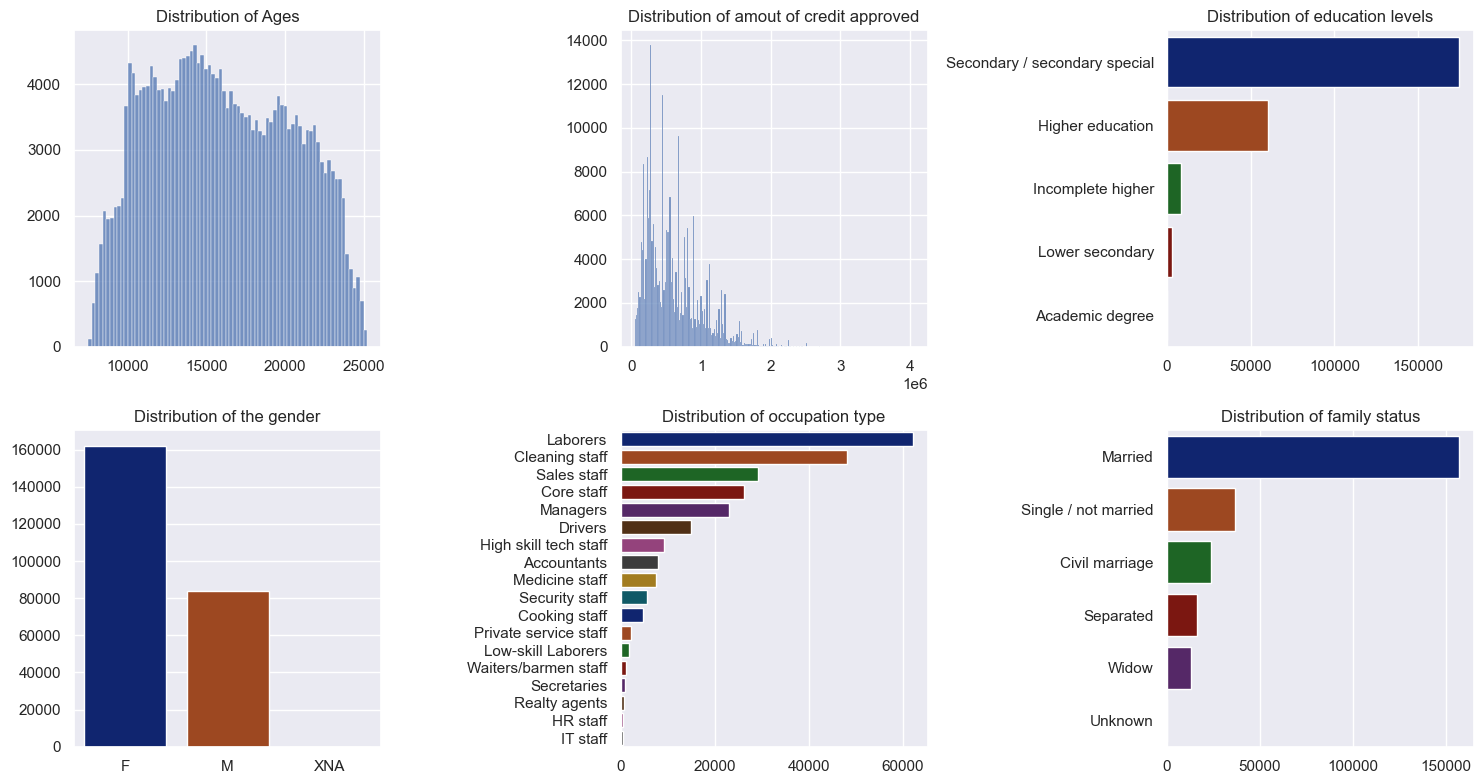

In [406]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)

# demographics_columns_hist = ['days_birth', 'cnt_children', 'amt_income_total', ]

# for i, column in enumerate(demographics_columns_hist):
#     sns.countplot(data=df_train, x=column, ax=axes[0, i], palette="dark")
#     axes[0, i].set_title(f"Distribution of {column}")
    
#     axes[0, i].tick_params(axis='x', rotation=45)


# demographics_columns = ['code_gender', 'name_family_status', 'name_education_type']

# for i, column in enumerate(demographics_columns):
#     sns.countplot(data=df_train, x=column, ax=axes[1, i], palette="dark")
#     axes[1, i].set_title(f"Distribution of {column}")
    
#     axes[1, i].tick_params(axis='x', rotation=45)


sns.histplot(data=df_train, x='days_birth', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Ages")

sns.histplot(data=df_train, x='amt_credit', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of amout of credit approved")


education_order = df_train.name_education_type.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_train, y='name_education_type', ax=axes[0, 2], palette="dark", order=education_order)
axes[0, 2].set_title(f"Distribution of education levels")
axes[0, 2].tick_params(axis='y', rotation=0)


gender_order = df_train.code_gender.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_train, x='code_gender', ax=axes[1, 0], palette="dark", order=gender_order)
axes[1, 0].set_title(f"Distribution of the gender")


occupation_order = df_train.occupation_type.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_train, y='occupation_type', ax=axes[1, 1], palette="dark", order=occupation_order)
axes[1, 1].set_title(f"Distribution of occupation type")
axes[1, 1].tick_params(axis='y', rotation=0)


status_order = df_train.name_family_status.value_counts().sort_values(ascending=False).index
sns.countplot(data=df_train, y='name_family_status', ax=axes[1, 2], palette="dark", order=status_order)
axes[1, 2].set_title(f"Distribution of family status")
axes[1, 2].tick_params(axis='y', rotation=0)




for i in range(2):
    for j in range(3):
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()

> Data is imbalanced in several categories such as the target itself, and teh gender

In [212]:
df_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_2,ext_source_3,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,prev_avg_approved_credit,prev_avg_approved_annuity,prev_status
281543,426165,1,Cash loans,F,Y,Y,1,135000.0,1006920.0,45630.0,900000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006305,16586,5049,1520.0,131,1,1,0,1,0,0,Sales staff,3.0,3,3,WEDNESDAY,8,0,0,0,0,0,0,Self-employed,0.000564,0.535276,0.0,0.0,0.0,0.0,304.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,78124.5000,13802.26500,1.0
196409,327733,0,Cash loans,F,N,Y,0,180000.0,675000.0,26770.5,675000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.035792,15061,809,6603.0,4989,1,1,1,1,1,0,Core staff,1.0,2,2,THURSDAY,16,0,0,0,0,0,0,Kindergarten,0.700792,0.344155,0.0,0.0,0.0,0.0,2151.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,85717.5000,14770.27500,1.0
52175,160421,0,Cash loans,F,N,Y,0,180000.0,90000.0,9031.5,90000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,17308,5600,2149.0,845,1,1,0,1,1,0,Laborers,1.0,2,2,TUESDAY,14,0,0,0,0,0,0,Government,0.702321,0.622922,1.0,0.0,1.0,0.0,1316.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,47497.5000,4499.13000,1.0
160868,286487,0,Cash loans,F,N,Y,1,135000.0,171000.0,13639.5,171000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.018209,11798,242,857.0,3190,1,1,0,1,1,0,Core staff,3.0,3,3,SUNDAY,9,0,0,0,0,0,0,Kindergarten,0.396511,0.626304,0.0,0.0,0.0,0.0,1724.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,90083.2500,6177.64500,1.0
88350,202576,0,Cash loans,F,N,Y,0,162000.0,1129500.0,43020.0,1129500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.026392,20124,365243,5359.0,3481,1,0,0,1,1,0,Cleaning staff,2.0,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.693000,0.535276,0.0,0.0,0.0,0.0,1260.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,283734.5625,34304.02875,1.0


In [323]:
pro = get_propotions('code_gender', df_train)
pro

code_gender  target
F            0         0.930251
             1         0.069749
M            0         0.898629
             1         0.101371
XNA          0         1.000000
Name: target, dtype: float64

In [ ]:
def PlotPropotions(propotions, column_name, xLabel_1, xLabel_2):
    # Propotions come from get_propotion function.
    propotions.unstack().plot(kind='bar', color=['#234E70', 'r']);
    plt.xlabel('');
    plt.title(f'Effect of {column_name} on the target', fontsize=15, fontweight='bold')
    plt.legend(labels=['Default', 'Repaied'], fontsize=14, bbox_to_anchor=(1.05, 0.7));
    plt.xticks([0, 1], [xLabel_1, xLabel_2], rotation=0);

In [ ]:
PlotPropotions(pro, 'code_gender', 'F', 'M')